# Project: **grad** in **Autograd**
Kelley Kelley
Numerical Computation Individual Project

Link to the repository: https://github.com/HIPS/autograd

Inspiration: 

Since we recently worked with differentiation and it's a topic I'm pretty confident in I decided to look up packages that involve differentiation on Github. The project I found is quite well documented and has several starts. The people who developed it later went to work on Jax which is something we've been talking about a lot in class. This software also involves gradients which I've been using a lot in my Natrual Language Processing, so it is relevant and applicable to my other classes as well. I also think we are about to go more in depth into gradients in Numerical Computation soon.

## About Autograd
What does the software package do (at a high level)? This package

The main developers for Autograd were Dougal Maclaurin, David Duvenaud, Matt Johnson, and Jamie Townsend. It is still being maintained but no longer actively developed. They moved on to go work on JAX. I don't know who any of theses people are so it may be nice to see what else they've worked on or explore their other projects further. 

This package is used for differentiating native Python and Numpy code. It provides the derivatives for a function you pass into it. There are several ways in which you can provide the methods. It accepts matrices, vectors of x's and the function, and a function and a single x. The method grad (the one I explore further) produces a single output when given a function and an x, and produces a single output. The method egrad does the same thing except for vectors and returns vectors. This project actually allows the user to do forward-mode differentiation and backward-mode differentiation depending on what the user wants and is doing. It actually sometimes uses both in parallel. 

This notebook is intended for people doing ML. This package is supposed to be used if you wanted to compute the loss yourself and get the gradients yourself. This gives a user more control and allows one to see and implement a lot of the math and choices themselves unlike the other wildly popular package TenserFlow. Therefore it mostly uses the reverse-mode differentiation since it is more practical for large vectors that produce a single output. Based upon its users this seems like the right choice, since ML is large vectors of weights or even matrices of weights that produce single probabilites for sets of vectors. It's also better than trying to compute derivatives yourself or making your own methods each time you need derivatives. Its easy implementation is quite appealing to the average coder who doesn't want to get to into the math and just neesd

It is written in Python and is meant to be used with numpy and allows a lot of Numpy functions and objects to be used within it. They have actually implemented a lot of nice functionality to try to make it as versatile as possible, and allow as much usage with Numpy as possible.

To use this package you can simply do
```c
pip install autograd
```
or in the case of a notebook like this one
```c
!pip install autograd
```

## About the method
The method grad highly relates to class because it is what we were doing last week. grad returns a single number given our x value and our function. For ML/logistic regression, you need derivatives in order to compute which direction you want to go. This can be quite difficult for high level ML/logistic regression, because they often have thousands of terms. This would be extremely difficult to implement by hand or figure out everytime you made a model. Therefore this package allows one to quickly and easily get high order derivatives. The grad function itself is extremely nice because it allows you to easily get the derivative for a point, which you could use to compute your loss and gradients and update weights. I think we actually used the JAX version of grad in the implicit surfaces notebook, which is probably built off of this original grad from autograd.

It is probably preferred over something like Tenserflow because it allows the user more control over their functions. I would prefer this method because Tenserflow is kind of hard to learn and does a lot of behind the scenes work that you can't see or manage yourself. Using this instead since I know the math I could easily plug this into my model and use it to more accurately and easily compute loss. It also has a lot of versatility with several forms of inputs. 

Some explanation of ML that some people may not be familiar with: gradients are gotten through using the derivative. In some cases they are actually equal. In ML you are trying to walk up a surface to the highest point. You want your weights to maximize the accuracy so you do this by following the slope of a high dimensional surface. The following is a 2d example.

![](./sin.png)

Let's say we started at x = 0.5 above. We want to end up somewhere around 1.5. Therefore we would take the derivative at 0.5, and compute a gradient that would take us toward 1.5, without undershooting/overshooting it. We would continue to do this until we converge. It is much like rootfinding, another topic we have gone over in Numerical Computation.

## Usage and examples

In [1]:
# installing and importing it for use
! pip install autograd
'''
This is an interesting thing they do that makes it seem as though the implement their own
version of numpy within their software. They commented it with 'Thinly-wrapped numpy'
It would be nice to know exactly what this means and how it relates to numpy. Did they also
work on numpy? Or is autograd within numpy
'''
import autograd.numpy as np 
from autograd import grad
from autograd import elementwise_grad as egrad
# for plotting useful information
import matplotlib.pyplot as plt

In [2]:
# Here I'm going to implement some functions and their derivatives for testing
# simple sin function
def sin(x):
    y = np.sin(x)
    return y
#derivative of sin
def sinp(x):
    y = np.cos(x)
    return y
# e^2x
def exp(x):
    y = np.exp(2*x)
    return y
# first derivative
def expp(x):
    y = 2*np.exp(2*x)
    return y
# eigth derivative because I wanna know accuracy as you compute derivative of derivative
def exp8p(x):
    y = (2**8)*np.exp(2*x)
    return y
# more complex random function
def fun1(x):
    y = np.sin( ( (np.exp(x) + 0.004)**(0.5) )/2 )
    return y
# functions derivative
def fun1p(x):
    y = (np.exp(x) * np.cos( ( (np.exp(x) + (1/250))**(0.5) )/2 ) )/(4*(np.exp(x) + (1/250))**0.5)
    return y

In [3]:
# Here I implement the simple differentiation from the beginning of the in class differentiation notebook
# I choose h using the simple and popular Walk and Pernice choice of h = eps * (1 + abs(x)), eps = 1e8
# We won't be doing small values of x so this method should be fine for a pretty ok comparison to grad
def diff_wp(f, x, eps=1e-8):
    h = eps * (1 + abs(x))
    return (f(x + h) - f(x)) / h
# and also the centered difference method with h computed in the same way
# I choose these methods because they are simple to compute and not the main point, I just wanted
# a general sense of the accuracy of grad and egrad compared to other approaches
def c_diff_wp(f, x, eps=1e-8):
    h = eps * (1 + abs(x))
    return (f(x + h) - f(x - h)) / (2*h)

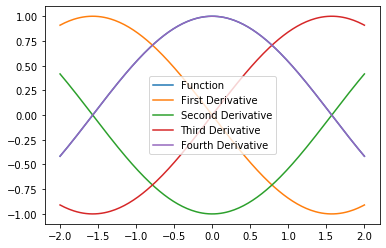

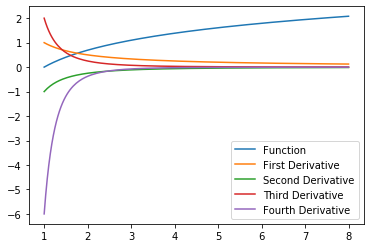

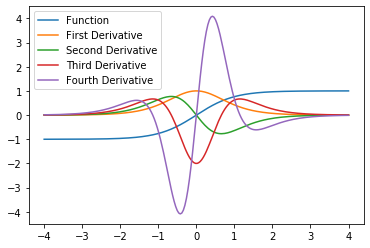

In [4]:
# Here I just show some implementation and graphs
# cos
x = np.linspace(-2, 2, 200)
plt.plot(x, np.cos(x), label='Function') # function
plt.plot(x, egrad(np.cos)(x), label='First Derivative')
plt.plot(x, egrad(egrad(np.cos))(x), label='Second Derivative')
plt.plot(x, egrad(egrad(egrad(np.cos)))(x), label='Third Derivative')
plt.plot(x, egrad(egrad(egrad(egrad(np.cos))))(x), label='Fourth Derivative')
plt.legend()
plt.show()
# ln(x)
x = np.linspace(1, 8, 200)
plt.plot(x, np.log(x), label='Function') # function
plt.plot(x, egrad(np.log)(x), label='First Derivative')
plt.plot(x, egrad(egrad(np.log))(x), label='Second Derivative')
plt.plot(x, egrad(egrad(egrad(np.log)))(x), label='Third Derivative')
plt.plot(x, egrad(egrad(egrad(egrad(np.log))))(x), label='Fourth Derivative')
plt.legend()
plt.show()
# a function that looks pretty from autograds project
def tanh(x):
    y = np.exp(-2.0 * x)
    return (1.0 - y) / (1.0 + y)
x = np.linspace(-4, 4, 200)
plt.plot(x, tanh(x), label='Function') # function
plt.plot(x, egrad(tanh)(x), label='First Derivative')
plt.plot(x, egrad(egrad(tanh))(x), label='Second Derivative')
plt.plot(x, egrad(egrad(egrad(tanh)))(x), label='Third Derivative')
plt.plot(x, egrad(egrad(egrad(egrad(tanh))))(x), label='Fourth Derivative')
plt.legend()
plt.show()

## Comparing to the other methods

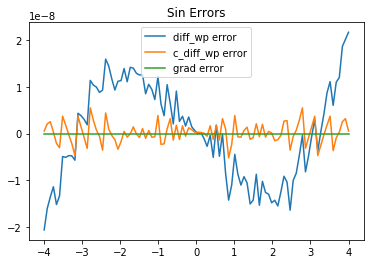

In [5]:
# egrad and grad are basically the same thing except egrad allows me to more easily plot
# since it can take in a vector instead of a single point so sometimes I'll use that
# The sin derivative
x = np.linspace(-4, 4, 100)
#plt.plot(x, sin(x), label='Sin Function')
#plt.plot(x, sinp(x), label='Derivative')
plt.plot(x, diff_wp(sin, x) - sinp(x), label='diff_wp error')
plt.plot(x, c_diff_wp(sin, x) - sinp(x), label='c_diff_wp error')
plt.plot(x, egrad(sin)(x) - sinp(x), label='grad error')
plt.legend()
plt.title('Sin Errors')
plt.show()

In [6]:
# wow, no error, unexpected
print(egrad(sin)(x) - sinp(x))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


I actually expected sin to have 0 erros in all areas or be extremely close since it is such a simple function, but these results are quite interesting. It appears grad has no error while c_diff_wp stays around 0 and diff_wp error looks like the sin function it's modeling. Although they all have remarkable accuracy considering the scale is 1e-8.

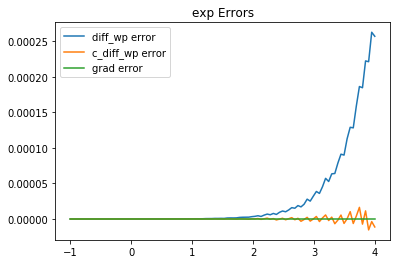

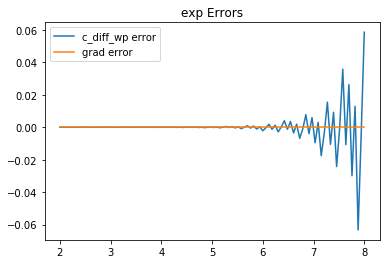

In [7]:
x = np.linspace(-1, 4, 100)
plt.plot(x, diff_wp(exp, x) - expp(x), label='diff_wp error')
plt.plot(x, c_diff_wp(exp, x) - expp(x), label='c_diff_wp error')
plt.plot(x, egrad(exp)(x) - expp(x), label='grad error')
plt.legend()
plt.title('exp Errors')
plt.show()
x = np.linspace(2, 8, 100)
plt.plot(x, c_diff_wp(exp, x) - expp(x), label='c_diff_wp error')
plt.plot(x, egrad(exp)(x) - expp(x), label='grad error')
plt.legend()
plt.title('exp Errors')
plt.show()

Once again our egrad outperforms, however it is also interesting that the diff_wp error explodes upward, and our c_diff_wp error grows larger and larger except jumps from positive to negative. It could be fun to explore why these explode and how egrad is able to mitigate these explosions of error. I wonder if egrad explodes much further down the line.

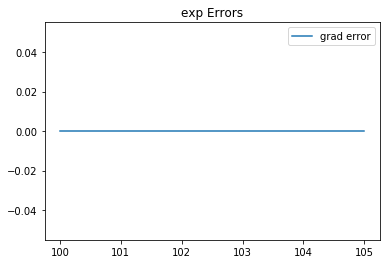

In [8]:
x = np.linspace(100, 105, 100)
# this one exploded to be about 1e85
#plt.plot(x, diff_wp(exp, x) - expp(x), label='diff_wp error')
# this one exploded to be 1e83 scale still oscilating between pos and neg
#plt.plot(x, c_diff_wp(exp, x) - expp(x), label='c_diff_wp error') 
plt.plot(x, egrad(exp)(x) - expp(x), label='grad error')
plt.legend()
plt.title('exp Errors')
plt.show()

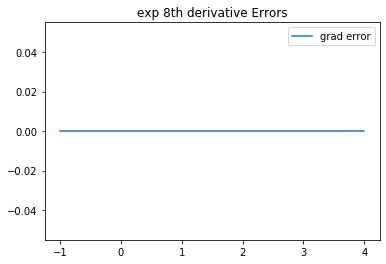

In [9]:
# out of curiosity I want to try the eighth derivative and see if accuracy drops significantly
x = np.linspace(-1, 4, 100)
# I was also going to try these but we know they will explode, just would be nice to see, however
# these take in functions as derivatives so I can't test the other methods easily. At least
# I don't know of a way to test them
#y_diff_wp = diff_wp(diff_wp(diff_wp(diff_wp(diff_wp(diff_wp(diff_wp(diff_wp(exp, x), x), x), x), x), x), x), x)
#y_c_diff_wp = c_diff_wp(c_diff_wp(c_diff_wp(c_diff_wp(c_diff_wp(c_diff_wp(c_diff_wp(c_diff_wp(exp, x), x), x), x), x), x), x), x)
#plt.plot(x, y_diff_wp - exp8p(x), label='diff_wp error')
#plt.plot(x, y_c_diff_wp - exp8p(x), label='c_diff_wp error')
plt.plot(x, egrad(egrad(egrad(egrad(egrad(egrad(egrad(egrad(exp))))))))(x) - exp8p(x), label='grad error')
plt.legend()
plt.title('exp 8th derivative Errors')
plt.show()

The eigth derivative of e is not hard and it's just multiple by 2 each time, but I expected little errors to compound a little bit at least since it is so many iterations. 

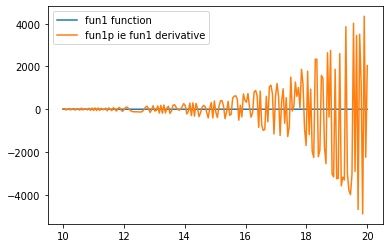

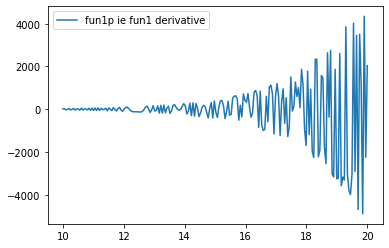

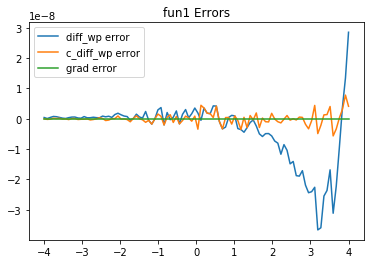

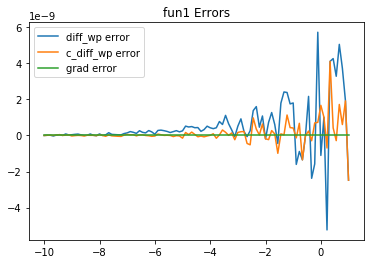

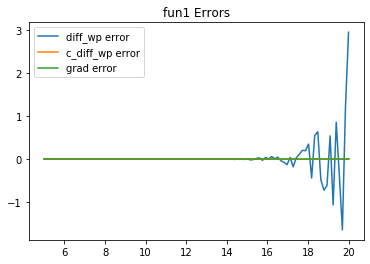

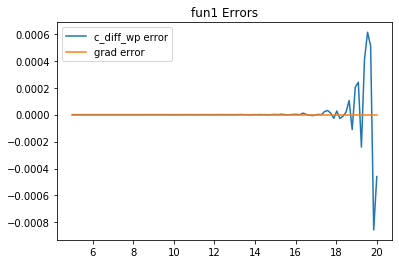

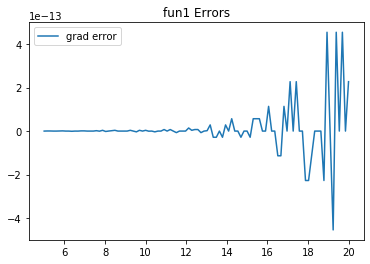

In [11]:
# and our final tests
x = np.linspace(10, 20, 200)
plt.plot(x, fun1(x), label='fun1 function')
plt.plot(x, fun1p(x), label='fun1p ie fun1 derivative')
plt.legend()
plt.show()
x = np.linspace(10, 20, 200)
#plt.plot(x, fun1(x), label='fun1 function')
plt.plot(x, fun1p(x), label='fun1p ie fun1 derivative')
plt.legend()
plt.show()
x = np.linspace(-4, 4, 100)
plt.plot(x, diff_wp(fun1, x) - fun1p(x), label='diff_wp error')
plt.plot(x, c_diff_wp(fun1, x) - fun1p(x), label='c_diff_wp error')
plt.plot(x, egrad(fun1)(x) - fun1p(x), label='grad error')
plt.legend()
plt.title('fun1 Errors')
plt.show()
x = np.linspace(-10, 1, 100)
plt.plot(x, diff_wp(fun1, x) - fun1p(x), label='diff_wp error')
plt.plot(x, c_diff_wp(fun1, x) - fun1p(x), label='c_diff_wp error')
plt.plot(x, egrad(fun1)(x) - fun1p(x), label='grad error')
plt.legend()
plt.title('fun1 Errors')
plt.show()
x = np.linspace(5, 20, 100)
plt.plot(x, diff_wp(fun1, x) - fun1p(x), label='diff_wp error')
plt.plot(x, c_diff_wp(fun1, x) - fun1p(x), label='c_diff_wp error')
plt.plot(x, egrad(fun1)(x) - fun1p(x), label='grad error')
plt.legend()
plt.title('fun1 Errors')
plt.show()
x = np.linspace(5, 20, 100)
#plt.plot(x, diff_wp(fun1, x) - fun1p(x), label='diff_wp error')
plt.plot(x, c_diff_wp(fun1, x) - fun1p(x), label='c_diff_wp error')
plt.plot(x, egrad(fun1)(x) - fun1p(x), label='grad error')
plt.legend()
plt.title('fun1 Errors')
plt.show()
x = np.linspace(5, 20, 100)
#plt.plot(x, diff_wp(fun1, x) - fun1p(x), label='diff_wp error')
#plt.plot(x, c_diff_wp(fun1, x) - fun1p(x), label='c_diff_wp error')
plt.plot(x, egrad(fun1)(x) - fun1p(x), label='grad error')
plt.legend()
plt.title('fun1 Errors')
plt.show()

The above are just a bunch of tests. We finally see error in egrad but I think that is more due to the sparatic nature of the function than egrads performance. I'm really surprised that it performs so well. However when I actually think about it these are simple 2d functions and they are using them for complex projects that involve heavy duty math and high dimensional functions. They even have a fluid backpropogation simulation which is really intense.  It could be nice to explore using specific values of h in the other functions to improve their accuracy and then see how well they perform and see if we can tailor them to outperform egrad.

Ideas for future direction. If you make h small enough it may be able to more accurately capture the sporadic nature of fun1, however machine epsilon and rounding errors may limit the accuracy before h. It could also be fun to explore the advanced applications of autograd. They have a lot of examples of projects in their github that could be fun to explore or mix up for our own complex project that involves the use of autograd.

## Questions
They mention being able to handle ifs and whiles. I'm curious about what this means and how that could not be by default. It seems like anything should be able to handle ifs and whiles so it may be nice to explore what exactly this means and if there are derivatives that can't be computed because they involve control statements.